In [40]:
import numpy as np
import pandas as pd
import queue
import matplotlib.pyplot as plt

from Backtest.backtest import Backtest
from Backtest.data import OHLCDataHandler
from MACDStrategy import MACDStrategy
from Backtest.open_json_gz_files import open_json_gz_files
from Backtest.generate_bars import generate_bars

In [41]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
import hyperopt.pyll.stochastic

In [42]:
def run_backtest(config, trading_data, ohlc_data, short_window, delta_window):
    short_window = int(short_window)
    long_window = short_window + int(delta_window)
    config['title'] = "MACDStrategy" + "_" + str(short_window) + "_" + str(long_window)
    print("---------------------------------")
    print(config['title'])
    print("---------------------------------")
    
    events_queue = queue.Queue()

    data_handler = OHLCDataHandler(
        config, events_queue,
        trading_data = trading_data, ohlc_data = ohlc_data
    )
    strategy = MACDStrategy(config, events_queue, data_handler,
                            short_window=short_window, long_window=long_window)

    backtest = Backtest(config, events_queue, strategy,
                        data_handler= data_handler)

    results = backtest.start_trading()
    
    # dict_ans = {
    #     "short_window": [short_window],
    #     "long_window": [long_window],
    #     "Sharpe Ratio": [results['sharpe']],
    #     "Total Returns": [(results['cum_returns'][-1] - 1)],
    #     "Max Drawdown": [(results["max_drawdown"] * 100.0)],
    #     "Max Drawdown Duration": [(results['max_drawdown_duration'])],
    #     "Trades": [results['trade_info']['trading_num']],
    #     "Trade Winning": [results['trade_info']['win_pct']],
    #     "Average Trade": [results['trade_info']['avg_trd_pct']],
    #     "Average Win": [results['trade_info']['avg_win_pct']],
    #     "Average Loss": [results['trade_info']['avg_loss_pct']],
    #     "Best Trade": [results['trade_info']['max_win_pct']],
    #     "Worst Trade": [results['trade_info']['max_loss_pct']],
    #     "Worst Trade Date": [results['trade_info']['max_loss_dt']],
    #     "Avg Days in Trade": [results['trade_info']['avg_dit']]
    # }
    # return pd.DataFrame(dict_ans)
    return -1 * (results['cum_returns'][-1] - 1)

In [43]:
def f(params):
    config = {
        "csv_dir": "C:/backtest/Binance",
        "out_dir": "C:/backtest/results/MACDStrategy",
        "title": "MACDStrategy",
        "is_plot": False,
        "save_plot": False,
        "save_tradelog": False,
        "start_date": pd.Timestamp("2017-07-01T00:0:00", freq = "60" + "T"),    # str(freq) + "T"
        "end_date": pd.Timestamp("2018-04-01T00:00:00", freq = "60" + "T"),
        "equity": 1.0,
        "freq": 60,      # min
        "commission_ratio": 0.001,
        "suggested_quantity": None,     # None or a value
        "max_quantity": None,           # None or a value, Maximum purchase quantity
        "min_quantity": None,           # None or a value, Minimum purchase quantity
        "min_handheld_cash": None,      # None or a value, Minimum handheld funds
        "exchange": "Binance",
        "tickers": ['BTCUSDT']
    }
    # trading_data = {}
    # for ticker in config['tickers']:
    #     # trading_data[ticker] = open_gz_files(config['csv_dir'], ticker)
    #     trading_data[ticker] = pd.read_hdf(config['csv_dir'] + '\\' + ticker + '.h5', key=ticker)

    ohlc_data = {}
    for ticker in config['tickers']:
        # ohlc_data[ticker] = generate_bars(trading_data, ticker, config['freq'])
        ohlc_data[ticker] = pd.read_hdf(config['csv_dir'] + '\\' + ticker + '_OHLC_60min.h5', key=ticker)

    trading_data = None
    
    short_window = params['short_window']
    delta_window = params['delta_window']
    val = run_backtest(config, trading_data, ohlc_data, short_window, delta_window)
    return {'loss': val, 'status': STATUS_OK}

In [44]:
space = {
    'short_window': hp.randint('short_window', 120),
    'delta_window': hp.randint('delta_window', 120)
}

In [45]:
# print(hyperopt.pyll.stochastic.sample(space))

In [46]:
trials = Trials()

In [47]:
best = fmin(fn=f, space=space, algo=tpe.suggest, max_evals=100, trials=trials)

---------------------------------
MACDStrategy_39_57
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 1.2409343907
Max Drawdown: 43.2233813072
Max Drawdown Duration: 2736
Total Returns: 0.5803877358
---------------------------------
Trades: 32
Trade Winning: 56%
Average Trade: 2.06%
Average Win: 8.27%
Average Loss: -5.91%
Best Trade: 26.69%
Worst Trade: -12.81%
Worst Trade Date: 0 days 09:00:00
Avg Days in Trade: 2 days 14:26:15
---------------------------------
---------------------------------
MACDStrategy_60_72
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
----------------------

---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 1.7202797478
Max Drawdown: 34.2412437931
Max Drawdown Duration: 2247
Total Returns: 0.9850677153
---------------------------------
Trades: 59
Trade Winning: 53%
Average Trade: 1.56%
Average Win: 5.90%
Average Loss: -3.26%
Best Trade: 18.25%
Worst Trade: -11.29%
Worst Trade Date: 0 days 13:00:00
Avg Days in Trade: 1 days 10:01:01
---------------------------------
---------------------------------
MACDStrategy_19_126
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 1.8476917011
Max Drawdown: 41.3352506897
Max Drawdown Duration: 2277
Total Returns: 1.1050859400
---------------------------------
Trades: 20
Trade Winning: 50

---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 1.8444627306
Max Drawdown: 38.0076127287
Max Drawdown Duration: 2018
Total Returns: 1.2073280715
---------------------------------
Trades: 20
Trade Winning: 50%
Average Trade: 4.76%
Average Win: 13.32%
Average Loss: -3.80%
Best Trade: 23.66%
Worst Trade: -11.16%
Worst Trade Date: 0 days 23:00:00
Avg Days in Trade: 4 days 04:42:00
---------------------------------
---------------------------------
MACDStrategy_107_197
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 1.3571169072
Max Drawdown: 38.3493812285
Max Drawdown Duration: 2510
Total Returns: 0.6713116941
---------------------------------
Trades: 9
Trade Winning: 5

---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 2.2191798788
Max Drawdown: 41.2517582827
Max Drawdown Duration: 2510
Total Returns: 1.5056441596
---------------------------------
Trades: 11
Trade Winning: 64%
Average Trade: 14.10%
Average Win: 26.54%
Average Loss: -7.68%
Best Trade: 145.90%
Worst Trade: -17.74%
Worst Trade Date: 2 days 03:00:00
Avg Days in Trade: 7 days 20:00:00
---------------------------------
---------------------------------
MACDStrategy_5_103
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 1.2361216264
Max Drawdown: 46.5197674206
Max Drawdown Duration: 2736
Total Returns: 0.6368249139
---------------------------------
Trades: 39
Trade Winning: 

---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 1.4906409782
Max Drawdown: 50.3147565171
Max Drawdown Duration: 2510
Total Returns: 0.7969728650
---------------------------------
Trades: 10
Trade Winning: 40%
Average Trade: 11.04%
Average Win: 40.06%
Average Loss: -8.31%
Best Trade: 127.54%
Worst Trade: -13.72%
Worst Trade Date: 3 days 23:00:00
Avg Days in Trade: 8 days 12:30:00
---------------------------------
---------------------------------
MACDStrategy_104_118
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 0.4371617263
Max Drawdown: 61.6159578531
Max Drawdown Duration: 2510
Total Returns: 0.0627164301
---------------------------------
Trades: 23
Trade Winning

---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 2.5558978220
Max Drawdown: 25.9530655795
Max Drawdown Duration: 1246
Total Returns: 2.1446574310
---------------------------------
Trades: 43
Trade Winning: 56%
Average Trade: 3.33%
Average Win: 9.27%
Average Loss: -4.17%
Best Trade: 28.30%
Worst Trade: -9.43%
Worst Trade Date: 0 days 07:00:00
Avg Days in Trade: 1 days 22:01:24
---------------------------------
---------------------------------
MACDStrategy_54_154
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 1.6441433024
Max Drawdown: 49.7030713672
Max Drawdown Duration: 2510
Total Returns: 0.9115136385
---------------------------------
Trades: 13
Trade Winning: 23%

---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 1.3662697648
Max Drawdown: 49.3230937442
Max Drawdown Duration: 2510
Total Returns: 0.6877420446
---------------------------------
Trades: 8
Trade Winning: 38%
Average Trade: 11.10%
Average Win: 44.16%
Average Loss: -8.73%
Best Trade: 97.82%
Worst Trade: -16.03%
Worst Trade Date: 2 days 20:00:00
Avg Days in Trade: 10 days 06:15:00
---------------------------------
---------------------------------
MACDStrategy_33_106
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 1.4303142854
Max Drawdown: 44.7916127855
Max Drawdown Duration: 2736
Total Returns: 0.7006120499
---------------------------------
Trades: 20
Trade Winning: 

---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 1.2962203578
Max Drawdown: 48.0526200941
Max Drawdown Duration: 2736
Total Returns: 0.6114846900
---------------------------------
Trades: 19
Trade Winning: 47%
Average Trade: 3.29%
Average Win: 12.19%
Average Loss: -4.72%
Best Trade: 25.76%
Worst Trade: -7.98%
Worst Trade Date: 1 days 01:00:00
Avg Days in Trade: 4 days 08:22:06
---------------------------------
---------------------------------
MACDStrategy_13_64
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 2.0736315584
Max Drawdown: 34.0726828000
Max Drawdown Duration: 1062
Total Returns: 1.5109370915
---------------------------------
Trades: 30
Trade Winning: 50%

---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 2.5262355851
Max Drawdown: 26.6859723690
Max Drawdown Duration: 941
Total Returns: 1.9808196408
---------------------------------
Trades: 38
Trade Winning: 61%
Average Trade: 3.61%
Average Win: 9.48%
Average Loss: -5.38%
Best Trade: 34.10%
Worst Trade: -15.86%
Worst Trade Date: 0 days 16:00:00
Avg Days in Trade: 2 days 03:25:16
---------------------------------
---------------------------------
MACDStrategy_88_174
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 1.3876114638
Max Drawdown: 48.2332726899
Max Drawdown Duration: 2510
Total Returns: 0.6920393289
---------------------------------
Trades: 9
Trade Winning: 33%


In [48]:
best

{'delta_window': 34, 'short_window': 13}

In [49]:
for trial in trials.trials:
    print(trial['misc']['vals'], "\t",trial['result']['loss'])

{'delta_window': [18], 'short_window': [39]} 	 -0.5803877358419538
{'delta_window': [12], 'short_window': [60]} 	 -0.41174545037864796
{'delta_window': [43], 'short_window': [4]} 	 -0.502316990479418
{'delta_window': [70], 'short_window': [28]} 	 -1.2579824115206324
{'delta_window': [68], 'short_window': [42]} 	 -0.9973432682810766
{'delta_window': [17], 'short_window': [64]} 	 -0.7969029204223916
{'delta_window': [66], 'short_window': [30]} 	 -1.1432854830660588
{'delta_window': [119], 'short_window': [16]} 	 -1.1355075027892205
{'delta_window': [13], 'short_window': [37]} 	 -0.12028898356456041
{'delta_window': [7], 'short_window': [9]} 	 0.3174724029745656
{'delta_window': [77], 'short_window': [80]} 	 -0.7492022505656173
{'delta_window': [4], 'short_window': [53]} 	 -0.9850677153171397
{'delta_window': [107], 'short_window': [19]} 	 -1.1050859400312993
{'delta_window': [109], 'short_window': [77]} 	 -0.44609596355476855
{'delta_window': [90], 'short_window': [47]} 	 -1.275377819182

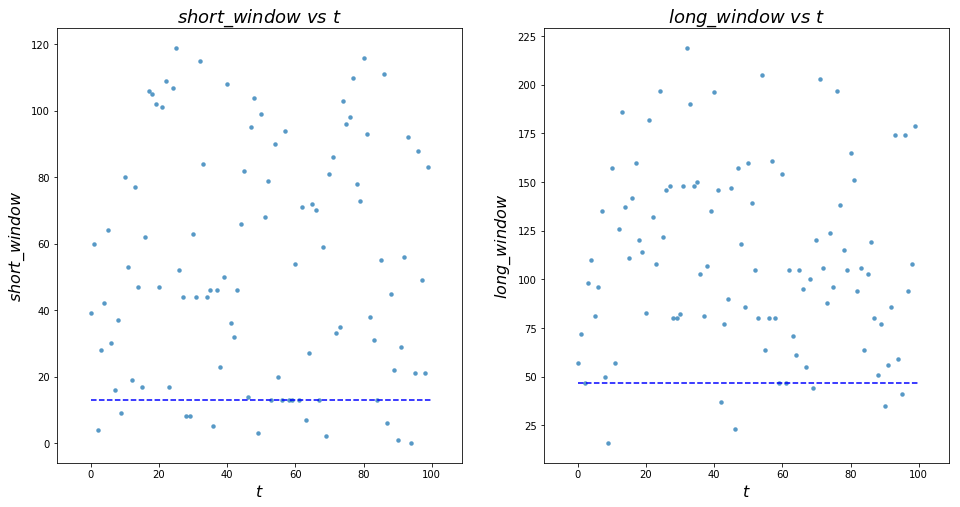

In [58]:
f, ax = plt.subplots(1,2, figsize = (16, 8))
xs = [t['tid'] for t in trials.trials]
ys = [t['misc']['vals']['short_window'] for t in trials.trials]
ax[0].set_xlim(xs[0]-10, xs[-1]+10)
ax[0].scatter(xs, ys, s=20, linewidth=0.01, alpha=0.75)
ax[0].set_title('$short\_window$ $vs$ $t$ ', fontsize=18)
ax[0].set_xlabel('$t$', fontsize=16)
ax[0].set_ylabel('$short\_window$', fontsize=16)
ax[0].hlines(best['short_window'], 0, 100,color='blue',linestyle="--")

xs = [t['tid'] for t in trials.trials]
ys = [[t['misc']['vals']['delta_window'][0]+ t['misc']['vals']['short_window'][0]] for t in trials.trials]
ax[1].set_xlim(xs[0]-10, xs[-1]+10)
ax[1].scatter(xs, ys, s=20, linewidth=0.01, alpha=0.75)
ax[1].set_title('$long\_window$ $vs$ $t$ ', fontsize=18)
ax[1].set_xlabel('$t$', fontsize=16)
ax[1].set_ylabel('$long\_window$', fontsize=16)
ax[1].hlines(best['delta_window'] + best['short_window'], 0, 100,color='blue',linestyle="--")

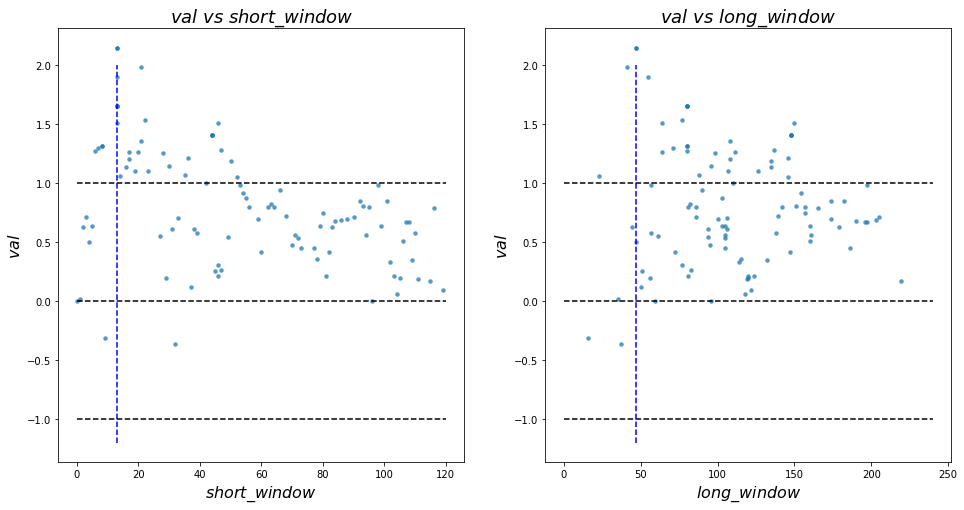

In [51]:
f, ax = plt.subplots(1,2, figsize = (16, 8))
xs = [t['misc']['vals']['short_window'] for t in trials.trials]
ys = [-1 * t['result']['loss'] for t in trials.trials]
ax[0].scatter(xs, ys, s=20, linewidth=0.01, alpha=0.75)
ax[0].set_title('$val$ $vs$ $short\_window$ ', fontsize=18)
ax[0].set_xlabel('$short\_window$', fontsize=16)
ax[0].set_ylabel('$val$', fontsize=16)
ax[0].hlines(0, 0, 120, color='black',linestyle="--")
ax[0].hlines(-1, 0, 120, color='black',linestyle="--")
ax[0].hlines(1, 0, 120, color='black',linestyle="--")
ax[0].vlines(best['short_window'], -1.2, 2, color='blue',linestyle="--")

xs = [[t['misc']['vals']['delta_window'][0]+ t['misc']['vals']['short_window'][0]] for t in trials.trials]
ys = [-1 * t['result']['loss'] for t in trials.trials]
ax[1].scatter(xs, ys, s=20, linewidth=0.01, alpha=0.75)
ax[1].set_title('$val$ $vs$ $long\_window$ ', fontsize=18)
ax[1].set_xlabel('$long\_window$', fontsize=16)
ax[1].set_ylabel('$val$', fontsize=16)
ax[1].hlines(0, 0, 240,color='black',linestyle="--")
ax[1].hlines(-1, 0, 240, color='black',linestyle="--")
ax[1].hlines(1, 0, 240,color='black',linestyle="--")
ax[1].vlines(best['delta_window'] + best['short_window'], -1.2, 2, color='blue',linestyle="--")